In [1]:
from sklearn import datasets 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
plt.style.use("ggplot")

In [6]:
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
X = iris.data

In [12]:
y = iris.target

In [13]:
X.shape, y.shape

((150, 4), (150,))

In [14]:
data = pd.DataFrame(X, columns = iris.feature_names)

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)

In [18]:
knn_6.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [19]:
knn_6.score(X,y)

0.9733333333333334

In [20]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)

In [21]:
knn_7.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [22]:
knn_7.score(X,y)

0.9733333333333334

In [23]:
new_data = np.array([[2.1,1.9,1.9,1.3], [2.0,2,5.5,2.1], [6.0,3.8,1.7,1.2]])

In [24]:
new_data

array([[2.1, 1.9, 1.9, 1.3],
       [2. , 2. , 5.5, 2.1],
       [6. , 3.8, 1.7, 1.2]])

In [25]:
new_data.shape

(3, 4)

In [26]:
preds = knn_6.predict(new_data)

In [27]:
preds

array([0, 1, 0])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 25, stratify = y)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [31]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)

In [32]:
knn_8.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
new_preds = knn_8.predict(X_test)

In [34]:
new_preds

array([2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 1, 1, 2, 0, 2, 1, 1])

In [35]:
y_test

array([2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 1, 1])

In [36]:
knn_8.score(X_test,y_test)

0.9666666666666667

In [37]:
knn_8.score(X,y)

0.9666666666666667

**Now, it is time to evaluate models performance based on different conditions. We will analyze models accuracy scores when
neighbors differ from 1 to 15. Then, we will decide how many neighbors should we pick for optimum performance based on the
training and testing scores of the model.**

In [38]:
n = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [39]:
train_scores = []

In [40]:
test_scores = []

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 44, stratify = y)

In [42]:
for i in n:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    training_score = knn.score(X_train,y_train)
    testing_score = knn.score(X_test,y_test)
    train_scores.append(training_score)
    test_scores.append(testing_score)

In [43]:
train_scores

[1.0,
 0.9833333333333333,
 0.9583333333333334,
 0.9583333333333334,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.9833333333333333,
 0.975,
 0.9833333333333333,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975]

In [44]:
test_scores

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

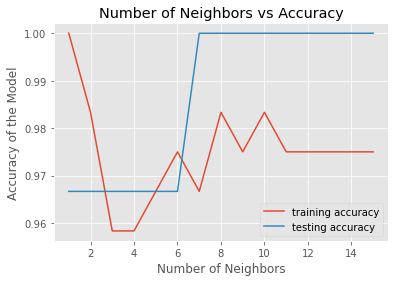

In [45]:
plt.plot(n, train_scores, label = "training accuracy")
plt.plot(n, test_scores, label = "testing accuracy")
plt.title("Number of Neighbors vs Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy of the Model")
plt.legend()
plt.show()

**It looks like choosing n = 8 will be the best for us since it has the optimum testing and training accuracy scores. Below 4 we 
have underfitting since our model performing well on the training data whereas low on the testing data. After 8 we start to have overfitting since our model looks like memorized the data. It will be best for us to pick 8,9,10 for neighbors and here my personal choice will be 8.**

### METRICS FOR CLASSIFICATION

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 33)

In [48]:
knn8 = KNeighborsClassifier(n_neighbors = 8)

In [49]:
knn8.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [50]:
preds = knn8.predict(X_test)

In [51]:
report = classification_report(y_test, preds)

In [52]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.83      1.00      0.91        15\n           2       1.00      0.84      0.91        19\n\n    accuracy                           0.93        45\n   macro avg       0.94      0.95      0.94        45\nweighted avg       0.94      0.93      0.93        45\n'

In [53]:
confusion_matrix(y_test, preds)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]], dtype=int64)

In [54]:
knn8.score(X_test, y_test)

0.9333333333333333

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression(random_state = 44)

In [57]:
logreg.fit(X_train, y_train)

c:\python\python383\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=44)

In [58]:
preds = logreg.predict(X_test)

In [59]:
classification_report(y_test, preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.83      1.00      0.91        15\n           2       1.00      0.84      0.91        19\n\n    accuracy                           0.93        45\n   macro avg       0.94      0.95      0.94        45\nweighted avg       0.94      0.93      0.93        45\n'

In [60]:
confusion_matrix(y_test, preds)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 16]], dtype=int64)

In [61]:
logreg.score(X_test,y_test)

0.9333333333333333

## LINEAR REGRESSION

In [62]:
import seaborn as sns 

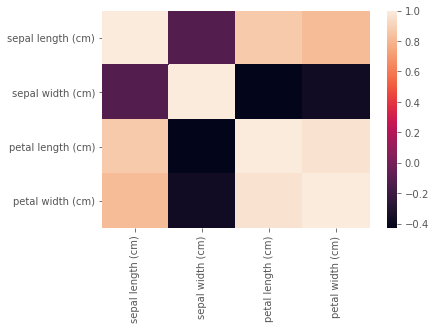

In [63]:
sns.heatmap(data.corr())

In [66]:
boston = datasets.load_boston()

In [67]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [68]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [69]:
features = boston.data

In [70]:
target = boston.target

In [71]:
features.shape

(506, 13)

In [72]:
target.shape

(506,)

In [73]:
target = target.reshape(-1,1)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
X_train, X_test, y_train,y_test = train_test_split(features, target, test_size = 0.3, random_state = 44)

In [77]:
X_train.shape, y_train.shape

((354, 13), (354, 1))

In [78]:
X_test.shape, y_test.shape

((152, 13), (152, 1))

In [79]:
regressor = LinearRegression()

In [80]:
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
# Training Score -- R2 Score
regressor.score(X_train, y_train)

0.7293698153057147

In [82]:
# Testing score -- R2 Score
regressor.score(X_test, y_test)

0.7532417995961475

In [83]:
regressor.coef_

array([[-1.04665683e-01,  5.86209331e-02, -5.05429305e-04,
         2.51348609e+00, -2.08012904e+01,  3.13959777e+00,
         4.85560551e-03, -1.78869240e+00,  2.98933987e-01,
        -1.16491699e-02, -9.96953430e-01,  1.06185800e-02,
        -5.28177921e-01]])

In [84]:
mean_squared_error(y_test, regressor.predict(X_test))

21.439149523649736

#### CROSS VALIDATION EXAMPLE

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
reg = LinearRegression()

In [87]:
%timeit CV_scores = cross_val_score(reg, features, target, cv = 10)

11.2 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [89]:
CV_scores = cross_val_score(reg, features, target, cv = 10)

In [90]:
CV_scores

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [91]:
CV_scores.mean()

0.2025289900605541

In [92]:
%timeit CV_scores = cross_val_score(reg, features, target, cv = 20)

22.5 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
%timeit CV_scores = cross_val_score(reg, features, target, cv = 5)

5.69 ms ± 99.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**When we use cross-validation we simply benefit from all the data both for training and testing purposes. It sounds great. However, there is a limit which if we increase the number of folds it requires more computational tasks which means more time. We must consider this while choosing the number of folds while applying cross validation in our model**

### RIDGE REGRESSION 

In [94]:
from sklearn.linear_model import Ridge

In [95]:
X_train, X_test, y_train,y_test = train_test_split(features, target, test_size = 0.2, random_state = 44)

In [96]:
ridge = Ridge(alpha = 0.15, normalize = True)

In [97]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.15, normalize=True)

In [98]:
ridge.score(X_train, y_train)

0.7157538559822729

In [99]:
ridge.score(X_test, y_test)

0.7659612019575993

In [100]:
features.shape

(506, 13)

In [101]:
ridge.coef_

array([[-8.06589875e-02,  2.49697106e-02, -6.21174031e-02,
         3.48044566e+00, -9.76899596e+00,  3.52285180e+00,
        -4.98926250e-03, -1.03741818e+00,  1.01938499e-01,
        -3.44244783e-03, -8.07359914e-01,  9.44051856e-03,
        -4.65356030e-01]])

In [102]:
ridge.intercept_

array([28.42492556])

## Ridge Regression with built-in Cross Validation 

In [103]:
from sklearn.linear_model import RidgeCV

In [104]:
Ridgecv = RidgeCV(alphas = (0.1,1,5), normalize = True)

In [105]:
Ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.1, 1. , 5. ]), normalize=True)

In [106]:
Ridgecv.best_score_

-25.39215472621661

In [107]:
Ridgecv.alpha_

0.1

In [108]:
Ridgecv.coef_

array([[-8.62489547e-02,  2.95061216e-02, -5.62627321e-02,
         3.48271227e+00, -1.16552371e+01,  3.49044553e+00,
        -3.82008876e-03, -1.19945271e+00,  1.32517706e-01,
        -4.24109895e-03, -8.44037689e-01,  9.69546464e-03,
        -4.93796680e-01]])

In [109]:
Ridgecv.score(X_test, y_test)

0.7667269287856006

## LASSO REGRESSION FOR FEATURE SELECTION !

In [110]:
from sklearn.linear_model import Lasso 

In [111]:
# try to choose alpha between 0 and 1.
lasso_reg = Lasso(alpha = 0.2)

In [112]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.2)

In [113]:
lasso_reg.coef_

array([-0.1075458 ,  0.05425862, -0.04953472,  0.21569939, -0.        ,
        2.7142119 , -0.00381819, -1.36857503,  0.28446959, -0.01417082,
       -0.79367901,  0.01071888, -0.6554825 ])

In [114]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**We can observe from above operations that Lasso Regression coefficients simply give us insights about which features are most 
important for our model. If coefficients are close to 0 than it means corresponding features can be negligible. Here this example we can clearly see that 2.7142 is the greatest coefficient in the Lasso Regression which corresponds to the Number of Rooms in the feature space. It is reasonable since number of rooms is a great factor when calculating the price of a house.
We should note the fact that only Lasso regression coefficients give us insights about feature selection not Ridge and normal Linear Regression coefficients.
Alpha = 0 means normal LinearRegression without any regularization/penalties for coefficients,
Alpha > 1 means we start punishing hard for high coefficients,
Alpha between 0 and 1 is good for penalizing high coefficients**

## HYPERPARAMETER TUNING -- GRIDSEARCHCV

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
knn = KNeighborsClassifier()

In [150]:
parameters = {"n_neighbors":[4,5,6,7,8,9,10,11,12,13,14,15]}

In [151]:
knn_grid = GridSearchCV(knn, param_grid=parameters,cv=8)

In [152]:
knn_grid.fit(X,y)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]})

In [153]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [154]:
knn_grid.best_params_

{'n_neighbors': 13}

In [155]:
knn_grid.best_score_

0.9802631578947367

In [156]:
from sklearn import svm

In [157]:
svc = svm.SVC()

In [158]:
parameters = {"C" : [0.1,1,10], "kernel" : ["linear", "poly","rbf","sigmoid"]}

In [159]:
classifier = GridSearchCV(svc, param_grid = parameters, cv = 10)

In [160]:
classifier.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [161]:
classifier.best_estimator_

SVC(C=0.1, kernel='poly')

In [162]:
classifier.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [163]:
classifier.best_score_

0.9866666666666667

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
tree_clf = DecisionTreeClassifier(random_state = 5)

In [166]:
parameters = {"criterion" : ("gini", "entropy"), "max_depth": [1,2,3,4,5,6,7,8,9,10], 
                 "min_samples_split":[2,3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

In [167]:
tree = GridSearchCV(tree_clf, parameters, cv = 10)

In [168]:
tree.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [169]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=5)

In [170]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [171]:
tree.best_score_

0.9666666666666666

### ELASTICNET -- COMBINES L1 AND L2 REGULARIZATON -- REGRESSION

In [197]:
from sklearn.linear_model import ElasticNet

In [198]:
data = datasets.load_boston()

In [199]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [200]:
X_reg = data.data

In [201]:
y_reg = data.target

In [202]:
X_reg_train, X_reg_test,y_reg_train,y_reg_test = train_test_split(X_reg, y_reg, test_size = 0.3, random_state = 40)

In [203]:
X_reg.shape, y_reg.shape

((506, 13), (506,))

In [204]:
X_reg_train.shape, y_reg_train.shape

((354, 13), (354,))

In [205]:
X_reg_test.shape, y_reg_test.shape

((152, 13), (152,))

In [206]:
elastic = ElasticNet()

In [207]:
l1_ratios = np.linspace(0,1,40)

In [208]:
params = {"l1_ratio" : l1_ratios}

In [209]:
regressor = GridSearchCV(elastic, params, cv = 10)

In [210]:
regressor.fit(X_reg_train, y_reg_train)

c:\python\python383\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3865.4910733012584, tolerance: 2.3462916132075473
  model = cd_fast.enet_coordinate_descent(
c:\python\python383\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3754.7152818256195, tolerance: 2.1152005534591196
  model = cd_fast.enet_coordinate_descent(
c:\python\python383\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4084.249630027107, tolerance: 2.287385911949686
  model = cd_fast.enet_coordinate_descent(
c:\python\python383\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'l1_ratio': array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23076923,
       0.25641026, 0.28205128, 0.30769231, 0.33333333, 0.35897436,
       0.38461538, 0.41025641, 0.43589744, 0.46153846, 0.48717949,
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ])})

In [211]:
regressor.best_params_

{'l1_ratio': 0.0}

In [212]:
regressor.best_score_

0.6362549429588671

In [213]:
regressor.best_estimator_

ElasticNet(l1_ratio=0.0)

In [214]:
regressor.score(X_reg_test, y_reg_test)

0.6641481055494167

In [215]:
regressor2 = ElasticNet(l1_ratio = 1.0)

In [216]:
regressor2.fit(X_reg_train, y_reg_train)

ElasticNet(l1_ratio=1.0)

In [217]:
regressor2.score(X_reg_test, y_reg_test)

0.6439373929767929

In [218]:
reg_scores = [] 

In [219]:
l1_ratios

array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23076923,
       0.25641026, 0.28205128, 0.30769231, 0.33333333, 0.35897436,
       0.38461538, 0.41025641, 0.43589744, 0.46153846, 0.48717949,
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ])

In [220]:
for l1 in l1_ratios:
    regressor = ElasticNet(l1_ratio = l1)
    regressor.fit(X_reg_train, y_reg_train)
    reg_scores.append(regressor.score(X_reg_test, y_reg_test))

c:\python\python383\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4391.160201484841, tolerance: 2.5293221949152542
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'L1 Ratio vs Regressor Performance on ElasticNet')

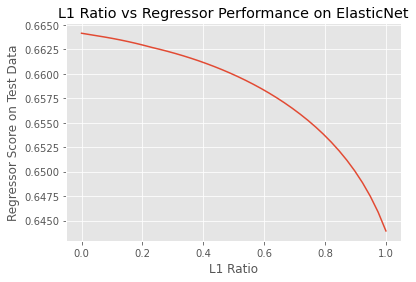

In [221]:
plt.plot(l1_ratios, reg_scores)
plt.xlabel("L1 Ratio")
plt.ylabel("Regressor Score on Test Data")
plt.title("L1 Ratio vs Regressor Performance on ElasticNet")

In [222]:
regressor

ElasticNet(l1_ratio=1.0)

In [223]:
regressor.predict(X_reg_test[0:4])

array([21.67257812, 29.67655859,  8.26266568, 15.11624964])

In [224]:
y_reg_test[0:4]

array([22.7, 30.3, 14.4, 13.4])

In [225]:
regressor2 = ElasticNet(l1_ratio = 0)

In [226]:
regressor2.fit(X_reg_train, y_reg_train)

c:\python\python383\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4391.160201484841, tolerance: 2.5293221949152542
  model = cd_fast.enet_coordinate_descent(


ElasticNet(l1_ratio=0)

In [227]:
regressor2.predict(X_reg_test[0:4])

array([21.98339911, 30.23557287,  8.45639791, 15.7763973 ])

In [228]:
y_reg_test[0:4]

array([22.7, 30.3, 14.4, 13.4])

In [229]:
from sklearn.metrics import mean_squared_error

In [230]:
preds = regressor2.predict(X_reg_test)

In [231]:
mean_squared_error(y_reg_test, preds)

38.39151598811068

In [232]:
preds2 = regressor.predict(X_reg_test)

In [233]:
mean_squared_error(y_reg_test, preds2)

40.701819749035764

**As we can see, mean squared error is greater when we use Regressor with l1_ratio = 1.0 which is expected since we already 
observed from the graph that l1_ratio = 0 is best performing while l1_ratio = 1.0 is the worst performing for our case.**

**MSE = 38.39 when l1_ratio = 0**

**MSE = 40.70 when l1_ratio = 1.0**


### PREPROCESSING DATA FOR MACHINE LEARNING TASKS 
**1. Categorical Features**

We need to convert categorical features into binary format such that our algorithm can understand what they mean. There are 2 ways to do that :

1. pd.get_dummies(dataframe)
2. scikit-learn OneHotEncoder()

In [234]:
df = pd.DataFrame({"name" : ["frkn", "smh", "sbl"]})

In [235]:
df

,name
0,frkn
1,smh
2,sbl


In [236]:
pd.get_dummies(df)

,name_frkn,name_sbl,name_smh
0,1,0,0
1,0,0,1
2,0,1,0


### 2.Handling with Missing Values 

In [237]:
df2 = pd.DataFrame({"name" : ["frkn","smh","sbl",0], "surname" : ["gnr", "acg",0,0], "age":[27,35,36,0] })

In [238]:
df2

,name,surname,age
0,frkn,gnr,27
1,smh,acg,35
2,sbl,0,36
3,0,0,0


In [239]:
df2.name.replace(0, np.nan, inplace = True)

In [240]:
df2

,name,surname,age
0,frkn,gnr,27
1,smh,acg,35
2,sbl,0,36
3,NaN,0,0


In [241]:
df2.surname.replace(0, np.nan, inplace = True) 
df2.age.replace(0, np.nan, inplace = True)

In [242]:
df2

,name,surname,age
0,frkn,gnr,27.0
1,smh,acg,35.0
2,sbl,NaN,36.0
3,NaN,NaN,NaN


In [243]:
df3 = df2.dropna()

In [244]:
df3

,name,surname,age
0,frkn,gnr,27.0
1,smh,acg,35.0


In [245]:
df2

,name,surname,age
0,frkn,gnr,27.0
1,smh,acg,35.0
2,sbl,NaN,36.0
3,NaN,NaN,NaN


In [246]:
df2.isnull().sum()

name       1
surname    2
age        1
dtype: int64

### 3.RESCALING DATA 

In [247]:
data = pd.DataFrame({"height" : [180,190,175,165], "weight" : [89,92, 77,60], "age" : [25,35,45,55]})

In [248]:
data

,height,weight,age
0,180,89,25
1,190,92,35
2,175,77,45
3,165,60,55


In [249]:
from sklearn.preprocessing import scale

In [250]:
data_scaled = scale(data)

In [251]:
data_scaled

array([[ 0.2773501 ,  0.7551822 , -1.34164079],
       [ 1.38675049,  0.99366079, -0.4472136 ],
       [-0.2773501 , -0.19873216,  0.4472136 ],
       [-1.38675049, -1.55011084,  1.34164079]])

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
scaler = StandardScaler()

In [254]:
scaler.fit(data)

StandardScaler()

In [255]:
data_scaled2 = scaler.transform(data)

In [256]:
data_scaled2

array([[ 0.2773501 ,  0.7551822 , -1.34164079],
       [ 1.38675049,  0.99366079, -0.4472136 ],
       [-0.2773501 , -0.19873216,  0.4472136 ],
       [-1.38675049, -1.55011084,  1.34164079]])

In [257]:
scaler.transform(np.array([177,67,45]).reshape(1,-1))

array([[-0.05547002, -0.99366079,  0.4472136 ]])

In [258]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
scaler2 = MinMaxScaler()

In [260]:
scaler2.fit(data)

MinMaxScaler()

In [261]:
data_scaled3 = scaler2.transform(data)

In [262]:
data_scaled3

array([[0.6       , 0.90625   , 0.        ],
       [1.        , 1.        , 0.33333333],
       [0.4       , 0.53125   , 0.66666667],
       [0.        , 0.        , 1.        ]])

In [263]:
scaled_df = pd.DataFrame(data_scaled, columns = ["height", "weight", "age"])

In [264]:
scaled_df

,height,weight,age
0,0.27735,0.755182,-1.341641
1,1.38675,0.993661,-0.447214
2,-0.27735,-0.198732,0.447214
3,-1.38675,-1.550111,1.341641


In [265]:
scaled_df3 = pd.DataFrame(data_scaled3, columns = ["height", "weight", "age"])

In [266]:
scaled_df3

,height,weight,age
0,0.6,0.90625,0.000000
1,1.0,1.00000,0.333333
2,0.4,0.53125,0.666667
3,0.0,0.00000,1.000000


In [267]:
scaler2.transform(np.array([177,67,45]).reshape(1,-1))

array([[0.48      , 0.21875   , 0.66666667]])

In [268]:
np.mean(data), np.std(data)

(height    177.5
 weight     79.5
 age        40.0
 dtype: float64,
 height     9.013878
 weight    12.579746
 age       11.180340
 dtype: float64)

In [269]:
np.mean(data_scaled3), np.std(data_scaled3)

(0.5364583333333333, 0.37921197455185734)

In [270]:
np.mean(data_scaled2), np.std(data_scaled2)

(-1.850371707708594e-17, 0.9999999999999999)